In [24]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Import the data and assign names to the columns

In [7]:
df = pd.read_csv('/Users/kariroesch/Dropbox/InsightHealthDataScience/dataChallenges/week5.csv',
                names = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", 
                         "Uniformity of Cell Shape","Marginal Adhesion", 
                         "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", 
                         "Normal Nucleoli","Mitoses", "Class"])

Explore the Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


What is in the "Bare Nuclei" column - it is a Pandas object

In [44]:
df["Bare Nuclei"].dtype

dtype('O')

In [45]:
df["Bare Nuclei"].head()

0     1
1    10
2     2
3     4
4     1
Name: Bare Nuclei, dtype: object

In [46]:
df["Bare Nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'], dtype=object)

Ah ha! There is a question mark that needs to be replaced. Replace it with "NA".

In [77]:
df["Bare Nuclei"].replace(['?'],['NA'],inplace=True)

In [78]:
df["Bare Nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', 'NA', '5', '8', '6'], dtype=object)

Remove the entries with missing data and put into a new dataframe

In [85]:
df2 = df[df["Bare Nuclei"] != "NA"]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null object
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [94]:
df2["Bare Nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [124]:
#turn "Bare Nuclei" into an integer instead of an object
#then check the type to make sure it worked and turn it into a dataframe

df3["Bare Nuclei"] = df2["Bare Nuclei"].astype(int)
df3["Bare Nuclei"].dtype
df4 = pd.DataFrame(df3["Bare Nuclei"])

In [127]:
#drop the old "Bare Nuclei" column from the original dataframe and add the 
#integer-formatted one here
data = pd.merge(left=df2[["Sample code number", "Clump Thickness", "Uniformity of Cell Size", 
                         "Uniformity of Cell Shape","Marginal Adhesion", 
                         "Single Epithelial Cell Size", "Bland Chromatin", 
                         "Normal Nucleoli","Mitoses", "Class"]], right=df4, 
                          left_index=True, right_index=True)

In [128]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Bare Nuclei
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,2.699854,3.544656
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.954592,3.643857
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000,6.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,10.000000


I also need to replace the Class values with 0 and 1

In [154]:
data["Class"].replace([2,4],[0,1],inplace=True)

In [155]:
data["Class"].unique()

array([0, 1])

Calculate correlation among variables

In [129]:
features = data[["Sample code number", "Clump Thickness", "Uniformity of Cell Size", 
                         "Uniformity of Cell Shape","Marginal Adhesion", 
                         "Single Epithelial Cell Size", "Bland Chromatin", 
                         "Normal Nucleoli","Mitoses", "Class", "Bare Nuclei"]]

corr =  features.corr()
corr.loc[:,:] =  np.tril(corr, k=-1)
corr = corr.stack()
corr[corr > 0.75]

Uniformity of Cell Shape     Uniformity of Cell Size     0.907228
Single Epithelial Cell Size  Uniformity of Cell Size     0.753544
Bland Chromatin              Uniformity of Cell Size     0.755559
Class                        Uniformity of Cell Size     0.820801
                             Uniformity of Cell Shape    0.821891
                             Bland Chromatin             0.758228
Bare Nuclei                  Class                       0.822696
dtype: float64

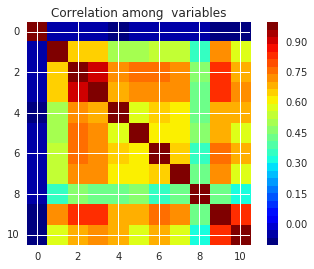

In [130]:
def correlation_matrix(df):
   import numpy as np
   from matplotlib import pyplot as plt
   from matplotlib import cm as cm

   fig = plt.figure()
   ax1 = fig.add_subplot(111)
   cmap = cm.get_cmap('jet', 30)
   cax = ax1.imshow(features.corr(), interpolation="nearest", cmap=cmap)
   ax1.grid(True)
   plt.title('Correlation among  variables')
   cbar = fig.colorbar(cax)
   plt.show()

correlation_matrix(features)

Plot histograms of each of the variables to get a feel for distributions

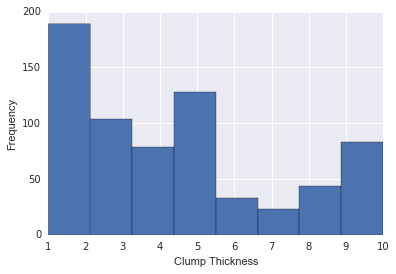

In [138]:
plt.figure();
data["Clump Thickness"].hist(bins=8)
plt.xlabel("Clump Thickness")
plt.ylabel("Frequency")

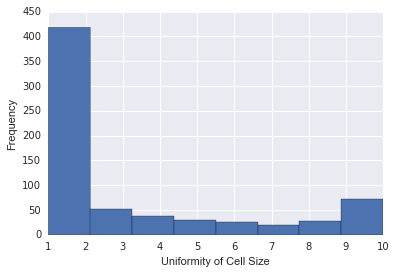

In [139]:
plt.figure();
data["Uniformity of Cell Size"].hist(bins=8)
plt.xlabel("Uniformity of Cell Size")
plt.ylabel("Frequency")

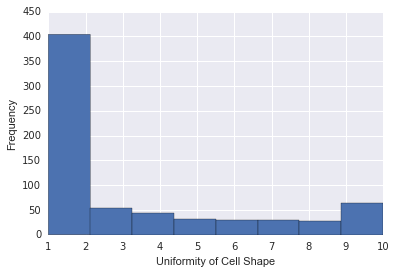

In [140]:
plt.figure();
data["Uniformity of Cell Shape"].hist(bins=8)
plt.xlabel("Uniformity of Cell Shape")
plt.ylabel("Frequency")

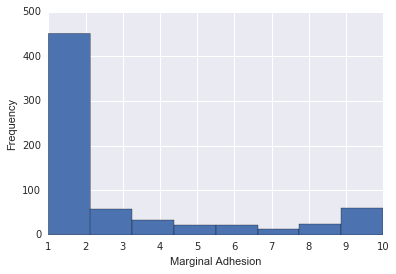

In [141]:
plt.figure();
data["Marginal Adhesion"].hist(bins=8)
plt.xlabel("Marginal Adhesion")
plt.ylabel("Frequency")

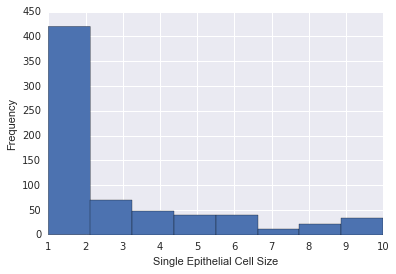

In [142]:
plt.figure();
data["Single Epithelial Cell Size"].hist(bins=8)
plt.xlabel("Single Epithelial Cell Size")
plt.ylabel("Frequency")

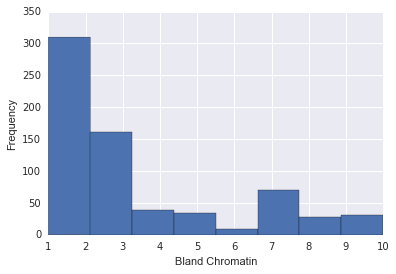

In [135]:
plt.figure();
data["Bland Chromatin"].hist(bins=8)
plt.xlabel("Bland Chromatin")
plt.ylabel("Frequency")

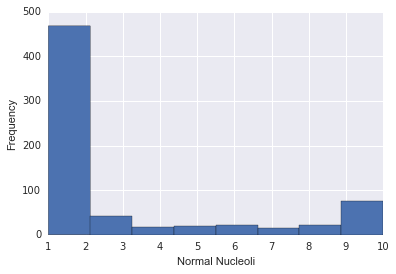

In [136]:
plt.figure();
data["Normal Nucleoli"].hist(bins=8)
plt.xlabel("Normal Nucleoli")
plt.ylabel("Frequency")

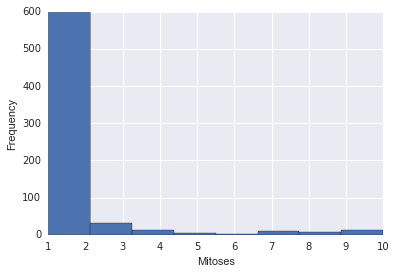

In [137]:
plt.figure();
data["Mitoses"].hist(bins=8)
plt.xlabel("Mitoses")
plt.ylabel("Frequency")

plt.figure();
data["Class"].hist(bins=8)
plt.xlabel("Class")
plt.ylabel("Frequency")

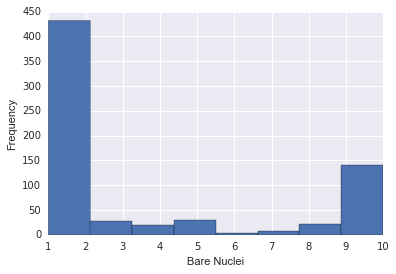

In [132]:
plt.figure();
data["Bare Nuclei"].hist(bins=8)
plt.xlabel("Bare Nuclei")
plt.ylabel("Frequency")

Looks like I'll need to use a non-parametric modeling approach! I'll send the new dataframe to a csv and open a new notebook.

In [156]:
data.to_csv('/Users/kariroesch/Dropbox/InsightHealthDataScience/dataChallenges/week5_cleaned.csv')